In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

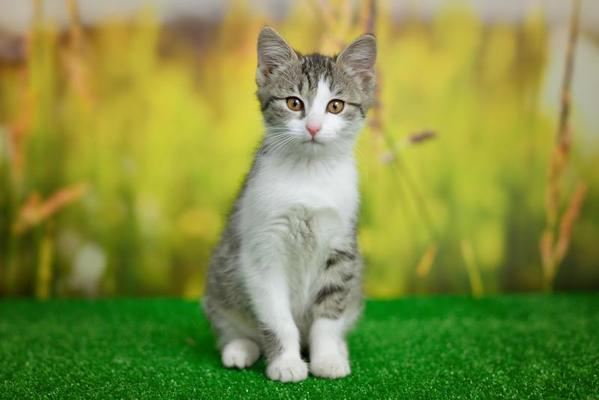

In [ ]:
image_path = '/content/image.jpg'
img_original = cv2.imread(image_path)
img_grayScale = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_original)

In [ ]:
def display_images(original_img, processed_img, original_title="Original Image", processed_title="Processed Image"):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title(original_title)
    plt.imshow(original_img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(processed_title)
    plt.imshow(processed_img, cmap='gray')
    plt.axis('off')

    plt.show()

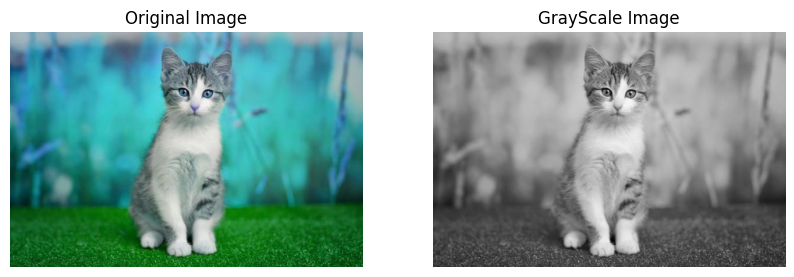

In [ ]:
display_images(img_original, img_grayScale, "Original Image", "GrayScale Image")

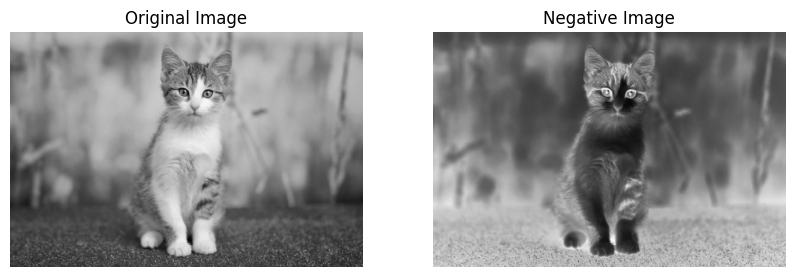

In [ ]:
# Image Negative
negative_img = 255 - img_grayScale
display_images(img_grayScale, negative_img, "Original Image", "Negative Image")

**Contrast Stretching (also called Normalization)** is an image enhancement technique used to improve the contrast of an image.
* dark areas darker
* bright areas brighter, so details become clearer.

s=[(rmax​−rmin​)/(r−rmin​)]​×(L−1)

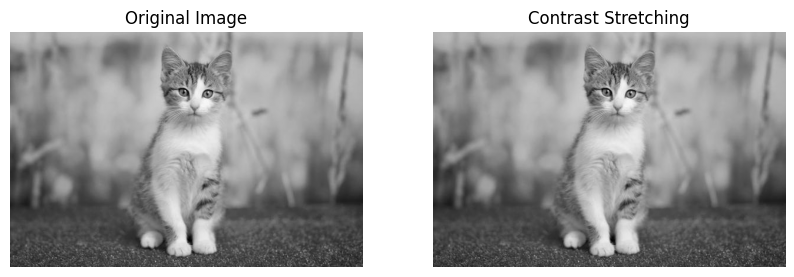

In [ ]:
# Contrast Stretching
r_min, r_max = np.min(img_grayScale), np.max(img_grayScale)
stretched = ((img_grayScale - r_min) / (r_max - r_min)) * 255
stretched = stretched.astype(np.uint8)
display_images(img_grayScale, stretched, "Original Image", "Contrast Stretching")

**Contrast Contraction** is an image processing technique used to reduce the contrast of an image.

In simple terms:

* Bright pixels become less bright

* Dark pixels become less dark
* The overall image looks flatter or softer

It’s the reverse of contrast stretching.

**When we stretch contrast**, we expand pixel values to cover a wider range (like 0–255).

**When we contract contrast**, we compress them into a narrower range (like 50–200).



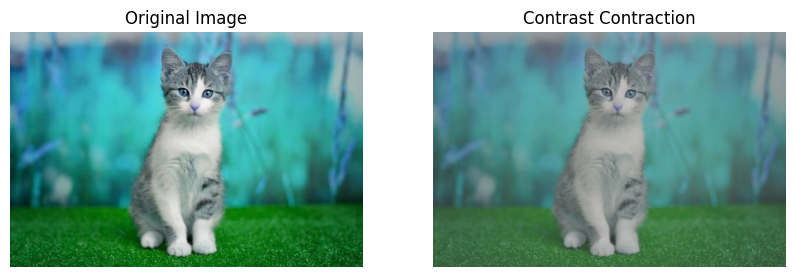

In [ ]:
r_min, r_max = np.min(img_original), np.max(img_original)
a, b = 50, 200
contracted = a + ((img_original - r_min) / (r_max - r_min)) * (b - a)
contracted = contracted.astype(np.uint8)

display_images(img_original, contracted, "Original Image", "Contrast Contraction")

| Type                | What Happens                          | Use Case                                   |
| ------------------- | ------------------------------------- | ------------------------------------------ |
| Preserve Background | Highlights selected range, keeps rest | Medical or satellite image enhancement     |
| Remove Background   | Only selected range visible           | Feature isolation or segmentation pre-step |


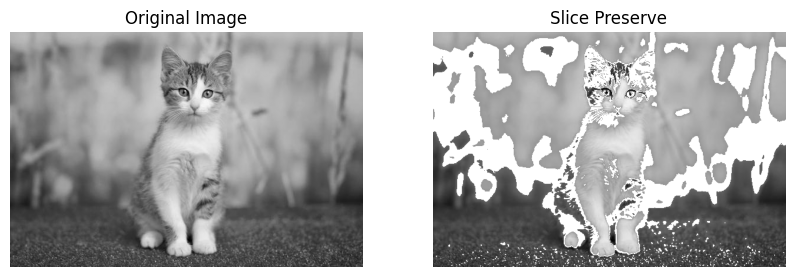

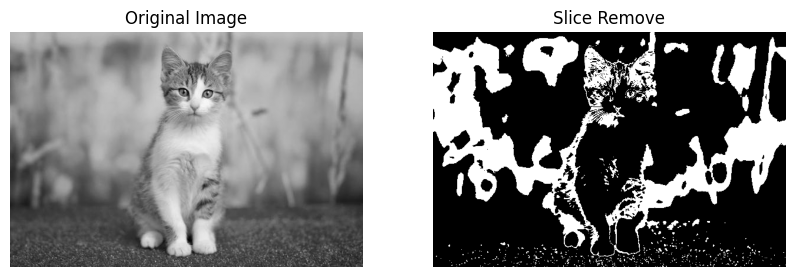

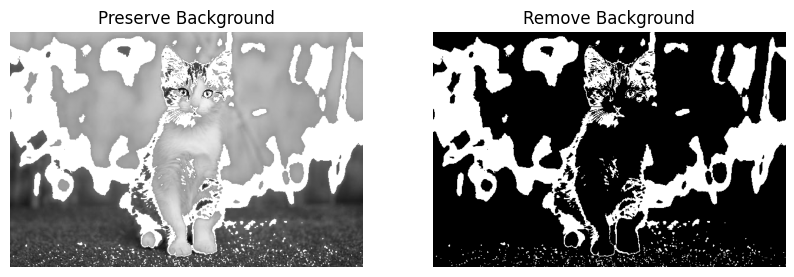

(None,)

In [ ]:
r1, r2 = 100, 150

# Keep background
slice_preserve = img_grayScale.copy()
slice_preserve[(img_grayScale >= r1) & (img_grayScale <= r2)] = 255

# Remove background
slice_remove = np.zeros_like(img_grayScale)
slice_remove[(img_grayScale >= r1) & (img_grayScale <= r2)] = 255

display_images(img_grayScale, slice_preserve, "Original Image", "Slice Preserve"),
display_images(img_grayScale, slice_remove, "Original Image", "Slice Remove"),
display_images(slice_preserve, slice_remove, "Preserve Background", "Remove Background"),

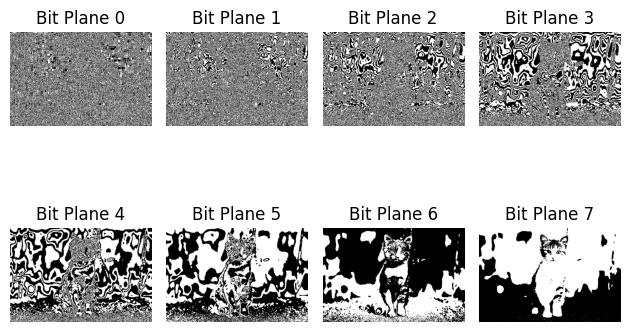

In [ ]:
# Bit Plane Slicing
for i in range(8):
    bit_plane = np.bitwise_and(img_grayScale, 1 << i)
    bit_plane = np.where(bit_plane > 0, 255, 0).astype(np.uint8)

    plt.subplot(2, 4, i+1)
    plt.imshow(bit_plane, cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()